In [1]:
import pandas as pd
a=pd.read_table("/home/jash/Desktop/petplan/Profitability1.txt", sep='|', lineterminator='\n', error_bad_lines=False)

Skipping line 267909: expected 33 fields, saw 34

Skipping line 299539: expected 33 fields, saw 34

/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
data=pd.DataFrame(data=a,index=None)
data = data.sample(frac=1).reset_index(drop=True)
import math
import numpy as np
data['LossRatio'].fillna(0, inplace=True)
data['L']=0
data.loc[data['LossRatio'] >8.451531 ,'L'] = 1
data.to_csv("/home/jash/Desktop/petplan/Profitability.csv")
Y=data['L']
y=pd.DataFrame(Y)
x=pd.DataFrame(data)

m=x.loc[x['PolicyForm']!='Introductory']
q=pd.DataFrame(m)
m2=q.loc[q['PolicyForm']!='Intro']
m3=pd.DataFrame(m2)
m4=m3.loc[m3['Quadrant']=='LowTenure-HighLR']
x=pd.DataFrame(m4)

print x.head()


    LossRatio  Duration               PetId   StartDate     EndDate  \
23  31.835243       546   US1291782Franklin  2015-05-14  2016-11-09   
53   0.649187       472  US1161522Mia Matei  2015-01-26  2016-05-11   
67  13.360763       300       US2103996Toby  2017-10-01  2018-09-30   
73   1.557230       232      US2180643Futch  2017-12-08  2018-12-07   
99  12.781145       366       US1556151Maja  2016-01-15  2017-01-14   

   LastPolicyRef  TotalClaimsAmtPaid  TotalEarnedPremium  \
23        223943           11057.056          347.321233   
53        175213             310.130          477.720601   
67        528094           15000.000         1122.690411   
73        566187            1415.960          909.281096   
99        347631            2415.892          189.020000   

               BreedName  Currentage ...    Surname  GivenName  \
23     Domestic Longhair         4.0 ...      banks     Cheryl   
53          Shih Tzu Mix         1.0 ...      Matei    Mariana   
67  Bernese Mo

In [3]:
x['LossRatio'].max()

526.2746201058766

In [4]:
len(x.loc[x['L']==1])

4189

In [5]:
len(x)

16161

In [6]:

x.isnull().sum()

LossRatio                           0
Duration                            0
PetId                               0
StartDate                           0
EndDate                             0
LastPolicyRef                       0
TotalClaimsAmtPaid                  0
TotalEarnedPremium                  0
BreedName                           0
Currentage                          0
CopayPct                            0
Deductible                          0
PetType                             0
PolicyForm                          0
CarrierCd                           0
ClaimNumber                         0
ClaimAmount                         0
ClaimDetails                        0
ConditionGrp                        0
Claimcodecategory                   0
Severity                           46
CustomerNumber                     61
Country                            61
PhoneNumber                        92
Surname                            63
GivenName                          67
CustomerMail

In [7]:
x.drop(['LossRatio'],axis=1,inplace=True)
x.drop(['CustomerNumber','PhoneNumber','Surname','GivenName','CustomerMailingAddr_Addr1','CustomerMailingAddr_City','CustomerMailingAddr_StateProvCd',
       'CustomerMailingAddr_PostalCode','PetId','StartDate','EndDate','LastPolicyRef'],axis=1,inplace=True)



In [8]:
p=pd.DataFrame(x)

In [9]:
p.drop(['ClaimNumber','ClaimAmount','Severity','ClaimDetails','ConditionGrp','Claimcodecategory','claimdurationInception'],axis=1,inplace=True)

In [10]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [11]:


p['TotalClaimsAmtPaid'].fillna(0, inplace=True)

In [12]:
p.isnull().sum()

Duration               0
TotalClaimsAmtPaid     0
TotalEarnedPremium     0
BreedName              0
Currentage             0
CopayPct               0
Deductible             0
PetType                0
PolicyForm             0
CarrierCd              0
Country               61
Quadrant               0
churn\r                0
L                      0
dtype: int64

In [13]:
p.dropna(how='any',inplace=True)

In [14]:
p.isnull().sum()

Duration              0
TotalClaimsAmtPaid    0
TotalEarnedPremium    0
BreedName             0
Currentage            0
CopayPct              0
Deductible            0
PetType               0
PolicyForm            0
CarrierCd             0
Country               0
Quadrant              0
churn\r               0
L                     0
dtype: int64

In [15]:
p.drop(['Quadrant','TotalClaimsAmtPaid','TotalEarnedPremium'],axis=1,inplace=True)

In [16]:
print p.shape

(16100, 11)


In [17]:

import h2o
from h2o.estimators import H2ORandomForestEstimator
h2o.init()
df = h2o.H2OFrame(p)
y = 'L'
x=df.col_names
print df
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
gbm_cv3 = H2OGradientBoostingEstimator(nfolds=3,max_depth=4,ntrees=130)
gbm_cv3.train(x=x, y=y, training_frame=train)
## Getting all cross validated models 
all_models = gbm_cv3.cross_validation_models()
print("Total cross validation models: " + str(len(all_models)))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/jash/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /tmp/tmpXAsplv
  JVM stdout: /tmp/tmpXAsplv/h2o_jash_started_from_python.out
  JVM stderr: /tmp/tmpXAsplv/h2o_jash_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 28 days !!!
H2O cluster name:,H2O_from_python_jash_3bpdlr
H2O cluster total nodes:,1
H2O cluster free memory:,1.714 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/h2o.py:562: UserWarning: [Lwater.parser.ParseWriter$ParseErr;@24b1c4cb
  warnings.warn(w)


Parse progress: |█████████████████████████████████████████████████████████| 100%


/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_be47d3d5763ee2845d446d64aeb64b7b at line 0 ( destination line 0 )  at byte offset 111; error = 'Unmatched quote char "'
  warnings.warn(w)
/home/jash/anaconda3/envs/py27/lib/python2.7/site-packages/h2o/job.py:69: UserWarning: ParseError at file upload_be47d3d5763ee2845d446d64aeb64b7b at line 2 ( destination line 2 )  at byte offset 117; error = 'Unmatched quote char "'
  warnings.warn(w)


Duration,BreedName,Currentage,CopayPct,Deductible,PetType,PolicyForm,CarrierCd,Country,churn,L
nan,BreedName,nan,nan,nan,PetType,nan,CarrierCd,Country,nan,nan
nan,,nan,nan,nan,,nan,,,nan,nan
546,Domestic Longhair,4,0.8,100,Cat,nan,ALZ,US,1,1
472,Shih Tzu Mix,1,0.9,100,Dog,nan,ALZ,US,1,0
300,Bernese Mountain Dog,0,0.8,250,Dog,15000,XLC,US,0,1
232,Saint Bernard,0,0.8,300,Dog,15000,XLC,US,0,0
366,Domestic Shorthair,1,0.9,200,Cat,nan,XLC,US,1,1
413,Schnauzer - miniature,8,0.9,500,Dog,nan,XLC,US,1,0
225,Mixed Breed Small ( up to 22lb ),0,0.8,300,Dog,15000,XLC,US,0,0
445,Labrador Mix,6,0.9,200,Dog,15000,XLC,US,1,0



gbm Model Build progress: |███████████████████████████████████████████████| 100%
Total cross validation models: 3


In [18]:
## Depth 10 is usually plenty of depth for most datasets, but you never know
hyper_params = {'max_depth' : [1,2,3,4,5,6,7,8,9,10]}
#hyper_params = {max_depth = [4,6,8,12,16,20]} ##faster for larger datasets

#Build initial GBM Model
gbm_grid = H2OGradientBoostingEstimator(
        ## more trees is better if the learning rate is small enough 
        ## here, use "more than enough" trees - we have early stopping
        ntrees=10000,
        ## smaller learning rate is better
        ## since we have learning_rate_annealing, we can afford to start with a 
        #bigger learning rate
        learn_rate=0.05,
        ## learning rate annealing: learning_rate shrinks by 1% after every tree 
        ## (use 1.00 to disable, but then lower the learning_rate)
        learn_rate_annealing = 0.99,
        ## sample 80% of rows per tree
        sample_rate = 0.8,
        ## sample 80% of columns per split
        col_sample_rate = 0.8,
        ## fix a random number generator seed for reproducibility
        seed = 1234,
        ## score every 10 trees to make early stopping reproducible 
        #(it depends on the scoring interval)
        score_tree_interval = 10, 
        ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
        #5 consecutive scoring events
        stopping_rounds = 5,
        stopping_metric = "AUC",
        stopping_tolerance = 1e-4)

#Build grid search with previously made GBM and hyper parameters
grid = H2OGridSearch(gbm_grid,hyper_params,
                         grid_id = 'depth_grid',
                         search_criteria = {'strategy': "Cartesian"})


#Train grid search
grid.train(x=x, 
           y=y,
           training_frame = train,
           validation_frame = valid)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [19]:
## by default, display the grid search results sorted by increasing logloss (since this is a classification task)
print grid

    max_depth           model_ids              logloss
0          10  depth_grid_model_9  0.18521023486211627
1           9  depth_grid_model_8  0.20958326962305207
2           8  depth_grid_model_7  0.24346022817726629
3           7  depth_grid_model_6   0.2755609465316466
4           6  depth_grid_model_5  0.32102128306419425
5           5  depth_grid_model_4  0.36009978077799687
6           4  depth_grid_model_3  0.39938527485863456
7           3  depth_grid_model_2   0.4409395578587861
8           2  depth_grid_model_1   0.4729661664416676
9           1  depth_grid_model_0   0.5149487247410822



In [20]:

## sort the grid models by decreasing AUC
sorted_grid = grid.get_grid(sort_by='auc',decreasing=True)
print(sorted_grid)

    max_depth           model_ids                 auc
0          10  depth_grid_model_9  0.9784013496876567
1           9  depth_grid_model_8  0.9729962154028543
2           8  depth_grid_model_7  0.9642177739273174
3           7  depth_grid_model_6  0.9540823491860837
4           6  depth_grid_model_5  0.9295007067621175
5           5  depth_grid_model_4  0.9039523961515663
6           4  depth_grid_model_3  0.8725074096028453
7           3  depth_grid_model_2  0.8316939492043226
8           2  depth_grid_model_1  0.7933509643883088
9           1  depth_grid_model_0   0.749518945784506



In [21]:

max_depths = sorted_grid.sorted_metric_table()['max_depth'][0:5]
new_max = int(max(max_depths, key=int))
new_min = int(min(max_depths, key=int))

print "MaxDepth", new_max
print "MinDepth", new_min

MaxDepth 10
MinDepth 6


In [22]:
new_min=1
new_max=5
# create hyperameter and search criteria lists (ranges are inclusive..exclusive))
hyper_params_tune = {'max_depth' : list(range(new_min,new_max+1,1)),
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'col_sample_rate_change_per_level': [x/100. for x in range(90,111)],
                'min_rows': [2**x for x in range(0,int(math.log(train.nrow,2)-1)+1)],
                'nbins': [2**x for x in range(4,11)],
                'nbins_cats': [2**x for x in range(4,13)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
                'histogram_type': ["UniformAdaptive","QuantilesGlobal","RoundRobin"]}
search_criteria_tune = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  ## limit the runtime to 60 minutes
                   'max_models': 100,  ## build no more than 100 models
                   'seed' : 1234,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "AUC",
                   'stopping_tolerance': 1e-3 }
       
           

In [23]:
gbm_final_grid = H2OGradientBoostingEstimator(distribution='bernoulli',
                    ## more trees is better if the learning rate is small enough 
                    ## here, use "more than enough" trees - we have early stopping
                    ntrees=10000,
                    ## smaller learning rate is better
                    ## since we have learning_rate_annealing, we can afford to start with a 
                    #bigger learning rate
                    learn_rate=0.05,
                    ## learning rate annealing: learning_rate shrinks by 1% after every tree 
                    ## (use 1.00 to disable, but then lower the learning_rate)
                    learn_rate_annealing = 0.99,
                    ## score every 10 trees to make early stopping reproducible 
                    #(it depends on the scoring interval)
                    score_tree_interval = 10,
                    ## fix a random number generator seed for reproducibility
                    seed = 1234,
                    ## early stopping once the validation AUC doesn't improve by at least 0.01% for 
                    #5 consecutive scoring events
                    stopping_rounds = 5,
                    stopping_metric = "AUC",
                    stopping_tolerance = 1e-4)
            
#Build grid search with previously made GBM and hyper parameters
final_grid = H2OGridSearch(gbm_final_grid, hyper_params = hyper_params_tune,
                                    grid_id = 'final_grid',
                           search_criteria = search_criteria_tune)
#Train grid search


x=df.col_names
x.remove(y)
df[y] = df[y].asfactor()
train, valid, test = df.split_frame(ratios=[.8,.1])


final_grid.train(x=x, 
           y=y,
           training_frame = train,
           validation_frame = valid)

print final_grid

gbm Grid Build progress: |████████████████████████████████████████████████| 100%
      col_sample_rate col_sample_rate_change_per_level  \
0                0.65                             1.08   
1                0.69                             0.97   
2                0.96                              1.1   
3                0.85                             1.07   
4                0.32                             1.02   
5                0.54                             1.07   
6                0.37                             0.93   
7                0.28                             1.08   
8                0.51                              1.1   
9                 0.4                             0.91   
10               0.91                             0.96   
11                0.5                             0.99   
12               0.34                             1.07   
13               0.55                             1.05   
14               0.63                            

[100 rows x 13 columns]



In [24]:

## Sort the grid models by AUC
sorted_final_grid = final_grid.get_grid(sort_by='auc',decreasing=True)

print sorted_final_grid

      col_sample_rate col_sample_rate_change_per_level  \
0                0.65                             1.08   
1                0.37                             0.93   
2                0.96                              1.1   
3                0.28                             1.08   
4                0.32                             1.02   
5                0.54                             1.07   
6                0.69                             0.97   
7                 0.4                             0.91   
8                0.85                             1.07   
9                0.51                              1.1   
10                0.2                             0.94   
11               0.74                             1.07   
12               0.76                             0.94   
13               0.91                             0.96   
14               0.34                             1.07   
15               0.55                             1.05   
16            

[100 rows x 13 columns]



In [25]:

#Get the best model from the list (the model name listed at the top of the table)
best_model = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
performance_best_model = best_model.model_performance(test)
print performance_best_model.auc()

0.867492332182


In [26]:

params_list = []
for key, value in best_model.params.iteritems():
    params_list.append(str(key)+" = "+str(value['actual']))
params_list

['learn_rate = 0.05',
 'fold_column = None',
 'col_sample_rate_per_tree = 0.95',
 'learn_rate_annealing = 0.99',
 'score_tree_interval = 10',
 'sample_rate_per_class = None',
 'seed = 1234',
 'keep_cross_validation_predictions = False',
 "model_id = {u'URL': u'/3/Models/final_grid_model_33', u'type': u'Key<Model>', u'name': u'final_grid_model_33', u'__meta': {u'schema_name': u'ModelKeyV3', u'schema_version': 3, u'schema_type': u'Key<Model>'}}",
 'nfolds = 0',
 'max_abs_leafnode_pred = 1.79769313486e+308',
 'offset_column = None',
 'categorical_encoding = AUTO',
 'pred_noise_bandwidth = 0.0',
 'stopping_tolerance = 0.0001',
 'fold_assignment = AUTO',
 "training_frame = {u'URL': u'/3/Frames/py_9_sid_a140', u'type': u'Key<Frame>', u'name': u'py_9_sid_a140', u'__meta': {u'schema_name': u'FrameKeyV3', u'schema_version': 3, u'schema_type': u'Key<Frame>'}}",
 'max_runtime_secs = 3524.0',
 'calibrate_model = False',
 'checkpoint = None',
 'balance_classes = False',
 'r2_stopping = 1.7976931348

In [27]:
gbm = h2o.get_model(sorted_final_grid.sorted_metric_table()['model_ids'][0])
#get the parameters from the Random grid search model and modify them slightly
params = gbm.params
new_params = {"nfolds":5, "model_id":None}
for key in new_params.keys():
    params[key]['actual'] = new_params[key] 
gbm_best = H2OGradientBoostingEstimator()


In [45]:
# Use same data as above

# GBM hyperparameters
gbm_params2 = {'learn_rate': [i * 0.01 for i in range(1, 11)],
                'max_depth': range(1, 4),
                'sample_rate': [i * 0.1 for i in range(5, 11)],
                'col_sample_rate': [i * 0.1 for i in range(1, 11)]}

# Search criteria
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 36, 'seed': 1}

# Train and validate a random grid of GBMs
gbm_grid2 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid2',
                          hyper_params=gbm_params2,
                          search_criteria=search_criteria)
gbm_grid2.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                ntrees=100,
                seed=1)

# Get the grid results, sorted by validation AUC
gbm_gridperf2 = gbm_grid2.get_grid(sort_by='auc', decreasing=True)
gbm_gridperf2

# Grab the top GBM model, chosen by validation AUC
best_gbm2 = gbm_gridperf2.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf2 = best_gbm2.model_performance(test)

best_gbm_perf2.auc()  #0.7811331652127048

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


0.9801456346279113

In [46]:
gbm_best=best_gbm2
gbm_best.train(x=x, y=y, training_frame=df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
gbm_best.confusion_matrix()
performance = gbm_best.model_performance(test_data=test)
print performance



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0975446128933
RMSE: 0.312321329552
LogLoss: 0.322501461311
Mean Per-Class Error: 0.171610306583
AUC: 0.917873458348
Gini: 0.835746916696
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.327537986819: 


,0,1,Error,Rate
0,1087.0,111.0,0.0927,(111.0/1198.0)
1,97.0,290.0,0.2506,(97.0/387.0)
Total,1184.0,401.0,0.1312,(208.0/1585.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3275380,0.7360406,176.0
max f2,0.1797443,0.7854406,263.0
max f0point5,0.4997311,0.7935887,106.0
max accuracy,0.4605522,0.8763407,121.0
max precision,0.9393812,1.0,0.0
max recall,0.0778090,1.0,338.0
max specificity,0.9393812,1.0,0.0
max absolute_mcc,0.3275380,0.6489371,176.0
max min_per_class_accuracy,0.2693576,0.8113695,205.0
max mean_per_class_accuracy,0.3266285,0.8283897,177.0


Gains/Lift Table: Avg response rate: 24.42 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0107256,0.9085372,4.0956072,4.0956072,1.0,1.0,0.0439276,0.0439276,309.5607235,309.5607235
,2,0.0239748,0.8903722,4.0956072,4.0956072,1.0,1.0,0.0542636,0.0981912,309.5607235,309.5607235
,3,0.0302839,0.8824709,4.0956072,4.0956072,1.0,1.0,0.0258398,0.1240310,309.5607235,309.5607235
,4,0.0403785,0.8351070,4.0956072,4.0956072,1.0,1.0,0.0413437,0.1653747,309.5607235,309.5607235
,5,0.0504732,0.8028742,4.0956072,4.0956072,1.0,1.0,0.0413437,0.2067183,309.5607235,309.5607235
,6,0.1009464,0.6490241,3.9420220,4.0188146,0.9625,0.98125,0.1989664,0.4056848,294.2021964,301.8814599
,7,0.1501577,0.4773616,2.7304048,3.5965627,0.6666667,0.8781513,0.1343669,0.5400517,173.0404823,259.6562656
,8,0.2,0.3919305,2.1255683,3.2299742,0.5189873,0.7886435,0.1059432,0.6459948,112.5568312,222.9974160
,9,0.3003155,0.2902910,1.4424780,2.6328904,0.3522013,0.6428571,0.1447028,0.7906977,44.2478020,163.2890365
,10,0.4,0.2280468,0.6998822,2.1511628,0.1708861,0.5252366,0.0697674,0.8604651,-30.0117751,115.1162791


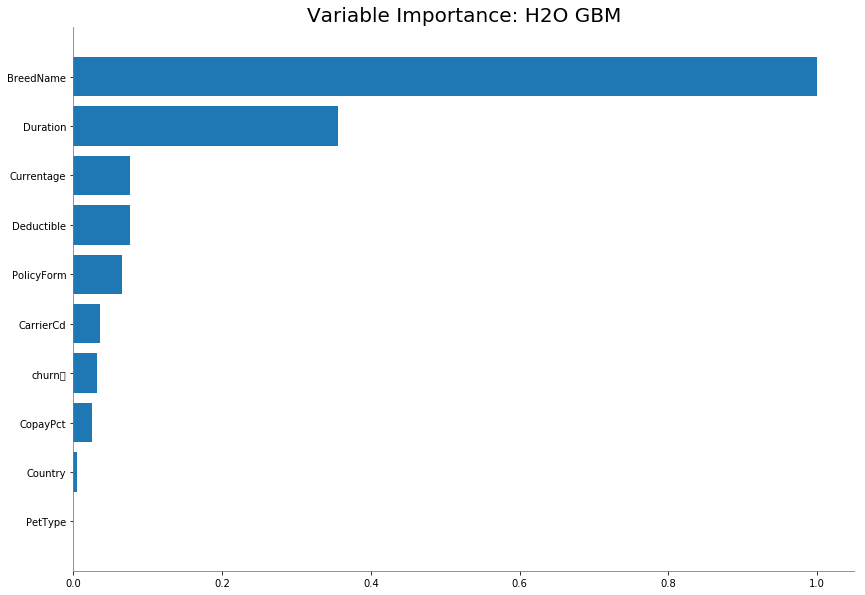

[(u'BreedName', 4456.4560546875, 1.0, 0.5972709166910721),
 (u'Duration', 1589.031005859375, 0.35656831041516973, 0.2129678816246552),
 (u'Currentage', 342.863037109375, 0.07693625448157092, 0.04595178724098547),
 (u'Deductible', 340.047119140625, 0.07630438064859817, 0.045574387377532735),
 (u'PolicyForm', 293.7195739746094, 0.06590877826914998, 0.03936539641480383),
 (u'CarrierCd',
  157.73306274414062,
  0.035394282095125774,
  0.021139975312578173),
 (u'churn\r', 144.2944793701172, 0.032378750648363694, 0.01933888608105983),
 (u'CopayPct', 111.92021942138672, 0.025114175490110358, 0.01499996661691867),
 (u'Country', 24.792131423950195, 0.00556319441271562, 0.003322734226613309),
 (u'PetType',
  0.5078832507133484,
  0.00011396572623646407,
  6.806841378061668e-05)]

In [48]:
import matplotlib.pyplot as plt
gbm_best.varimp_plot()
gbm_best.varimp()

In [49]:
import subprocess
from IPython.display import Image

In [50]:
mojo_file_name = "/home/jash/Desktop/petplan/treeshyper/my_gbm_mojo.zip"
h2o_jar_path= '/home/jash/Desktop/petplan/trees/h2o-3.20.0.4/h2o.jar'
mojo_full_path = mojo_file_name
gv_file_path = "/home/jash/Desktop/petplan/treeshyper/my_gbm_graph.gv"

In [51]:
image_file_name = "/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4"

In [52]:
gbm_cv3.download_mojo(mojo_file_name)

'/home/jash/Desktop/petplan/treeshyper/my_gbm_mojo.zip'

In [53]:

def generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_path, tree_id = 0):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["java", "-cp", h2o_jar_path, "hex.genmodel.tools.PrintMojo", "--tree", str(tree_id), "-i", mojo_full_path , "-o", gv_file_path ], shell=False)
    result = subprocess.call(["ls",gv_file_path], shell = False)
    if result is 0:
        print("Success: Graphviz file " + gv_file_path + " is generated.")
    else: 
        print("Error: Graphviz file " + gv_file_path + " could not be generated.")

In [54]:
def generateTreeImage(gv_file_path, image_file_path, tree_id):
    image_file_path = image_file_path + "_" + str(tree_id) + ".png"
    result = subprocess.call(["dot", "-Tpng", gv_file_path, "-o", image_file_path], shell=False)
    result = subprocess.call(["ls",image_file_path], shell = False)
    if result is 0:
        print("Success: Image File " + image_file_path + " is generated.")
        print("Now you can execute the follow line as-it-is to see the tree graph:") 
        print("Image(filename='" + image_file_path + "\')")
    else:
        print("Error: Image file " + image_file_path + " could not be generated.")

In [55]:

generateTree(h2o_jar_path, mojo_full_path, gv_file_path, image_file_name, 0)

Success: Graphviz file /home/jash/Desktop/petplan/treeshyper/my_gbm_graph.gv is generated.


In [56]:
generateTreeImage(gv_file_path, image_file_name, 0)

Success: Image File /home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4_0.png is generated.
Now you can execute the follow line as-it-is to see the tree graph:
Image(filename='/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4_0.png')


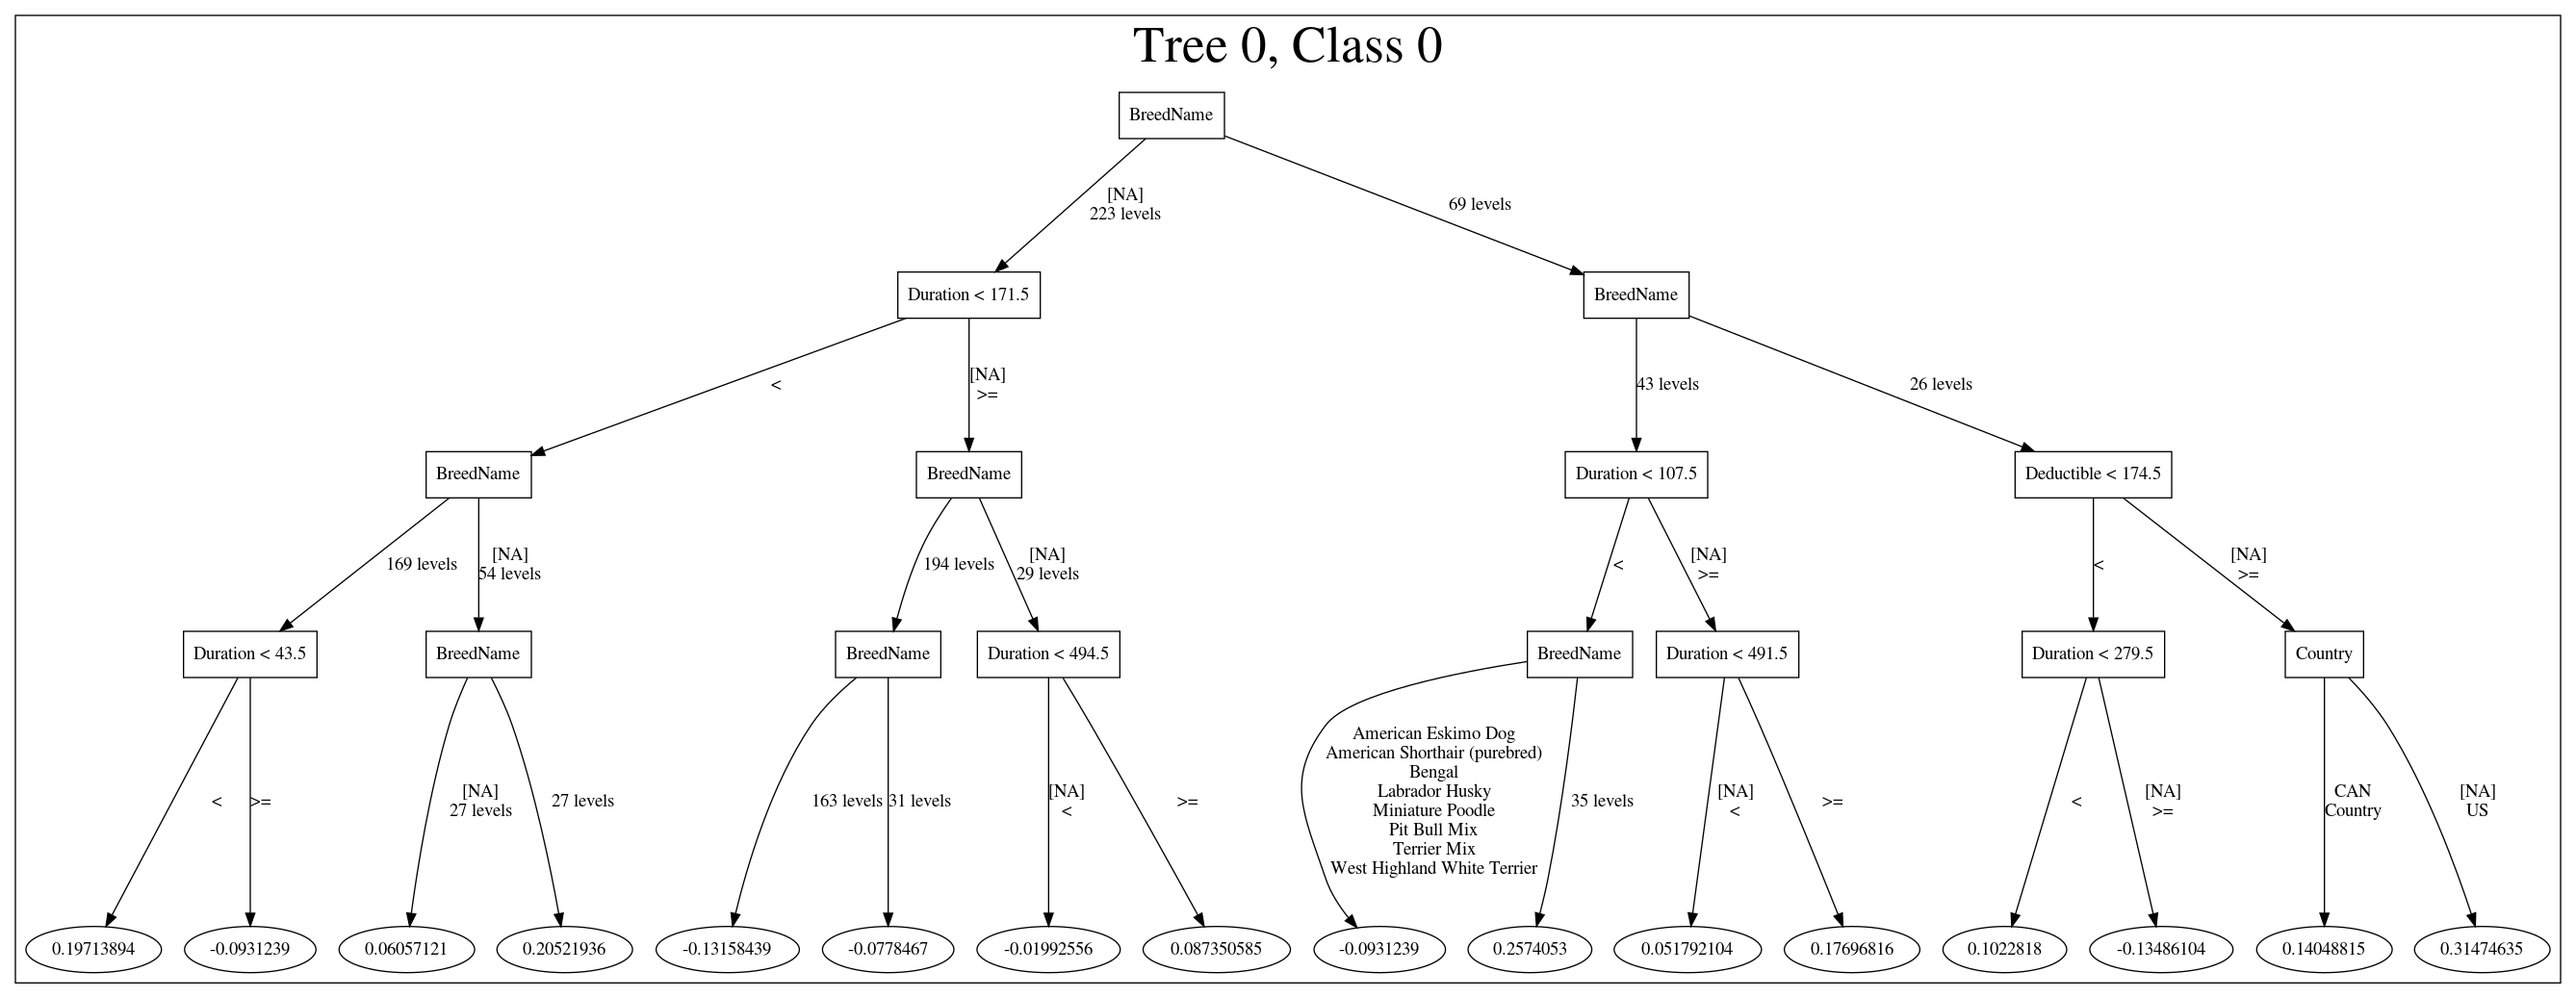

In [57]:
Image(filename='/home/jash/Desktop/petplan/treeshyper/my_gbm_tree_best4_0.png')